Importing all libraries

In [ ]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

Loading the desired data

In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person = 150, resize = 0.4)
X = lfw_people.data
y = lfw_people.target

Separating test and train data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42,test_size = 0.25)
#X_train.shape

(574, 1850)

Feature reduction using PCA

In [ ]:
pca = PCA(n_components=0.99, whiten=True).fit(X_train)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#X_train.shape

(574, 263)

Classifying using MLP

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(170,70,36), max_iter=300,activation = 'relu',solver='adam',random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.921875


از جدول پایین برداشت می شود: از بین کل ۴۸ عکس از نفر صفر، ۴۶ نفر به اشتباه نفر اول تشخیص داده شده اند و ۲ نفر به درستی تشخیص داده شده است. همجنین از بین ۱۴۴ عکس از نفر اول، ۱۳۱ عکس به درستی نفر اول تشخیص داده شده و ۱۳ نفر به اشتباه نفر ۰ تشخیص داده شده اند

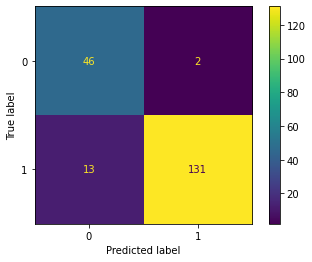

In [ ]:
cm = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()